In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the dataset
file_path = '/content/DMart_Grocery_Sales.csv'
data = pd.read_csv(file_path)

In [ ]:
# Inspect the dataset
print(data.head())
print(data.describe())
print(data.info())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.9328

In [ ]:
# Convert 'Order Date' to datetime format and sort by date
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True, errors='coerce')
data = data.sort_values('Order Date')

In [ ]:
# Check for missing values
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
# Split into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
# ARIMA Model
arima_model = ARIMA(train['Sales'], order=(5, 1, 0))  # You can adjust the order parameters
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
arima_mse = mean_squared_error(test['Sales'], arima_forecast)
print("ARIMA MSE:", arima_mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA MSE: 343330.6122666803


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# SARIMA Model
sarima_model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test))
sarima_mse = mean_squared_error(test['Sales'], sarima_forecast)
print("SARIMA MSE:", sarima_mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


SARIMA MSE: 342308.7198457534


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Random Forest Model
X_train = np.arange(len(train)).reshape(-1, 1)
X_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)
y_train = train['Sales']
y_test = test['Sales']

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_forecast = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_forecast)
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 341441.30539489747


In [ ]:
# Gradient Boosting Machine Model
gbm_model = GradientBoostingRegressor(n_estimators=100)
gbm_model.fit(X_train, y_train)
gbm_forecast = gbm_model.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_forecast)
print("GBM MSE:", gbm_mse)

# Compare Model Performance
print("ARIMA MSE:", arima_mse)
print("SARIMA MSE:", sarima_mse)
print("Random Forest MSE:", rf_mse)
print("GBM MSE:", gbm_mse)

GBM MSE: 359741.7091190731
ARIMA MSE: 343330.6122666803
SARIMA MSE: 342308.7198457534
Random Forest MSE: 341441.30539489747
GBM MSE: 359741.7091190731


In [ ]:
# Compare Model Performance
print("ARIMA MSE:", arima_mse)
print("SARIMA MSE:", sarima_mse)
print("Random Forest MSE:", rf_mse)
print("GBM MSE:", gbm_mse)

ARIMA MSE: 343330.6122666803
SARIMA MSE: 342308.7198457534
Random Forest MSE: 341441.30539489747
GBM MSE: 359741.7091190731


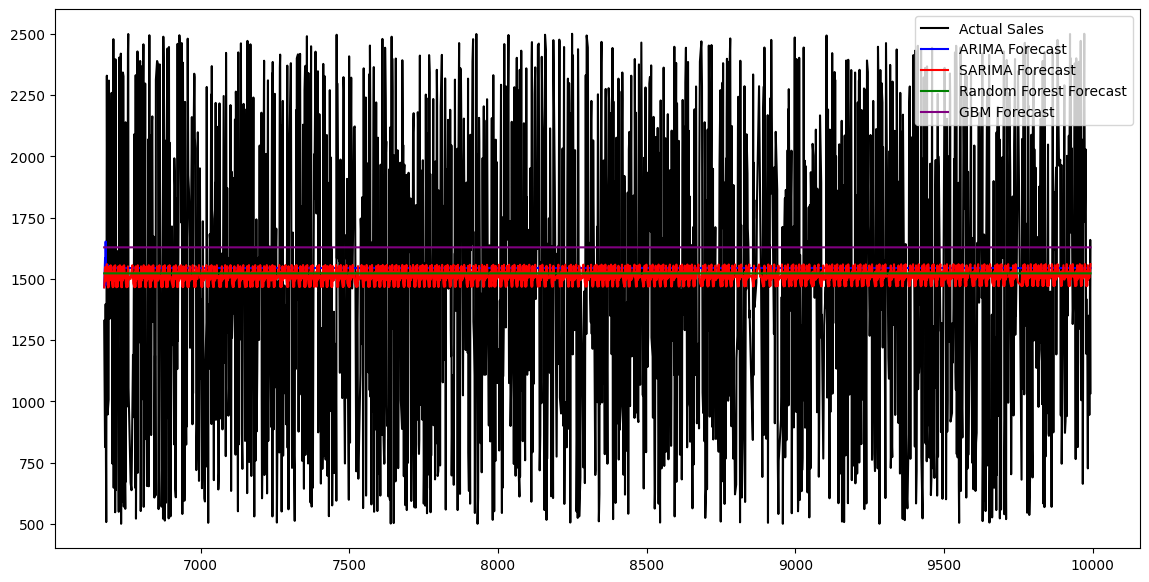

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Sales'], label='Actual Sales', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.plot(test.index, rf_forecast, label='Random Forest Forecast', color='green')
plt.plot(test.index, gbm_forecast, label='GBM Forecast', color='purple')
plt.legend()
plt.show()

In [ ]:
# Calculate and print accuracy metrics for ARIMA Model
arima_r2 = r2_score(test['Sales'], arima_forecast)
arima_mae = mean_absolute_error(test['Sales'], arima_forecast)
print("ARIMA R-squared:", arima_r2)
print("ARIMA MAE:", arima_mae)

# Calculate and print accuracy metrics for SARIMA Model
sarima_r2 = r2_score(test['Sales'], sarima_forecast)
sarima_mae = mean_absolute_error(test['Sales'], sarima_forecast)
print("SARIMA R-squared:", sarima_r2)
print("SARIMA MAE:", sarima_mae)

# Calculate and print accuracy metrics for Random Forest Model
rf_r2 = r2_score(y_test, rf_forecast)
rf_mae = mean_absolute_error(y_test, rf_forecast)
print("Random Forest R-squared:", rf_r2)
print("Random Forest MAE:", rf_mae)

# Calculate and print accuracy metrics for GBM Model
gbm_r2 = r2_score(y_test, gbm_forecast)
gbm_mae = mean_absolute_error(y_test, gbm_forecast)
print("GBM R-squared:", gbm_r2)
print("GBM MAE:", gbm_mae)

# Summary of all models
print("\nSummary of Model Accuracy:")
print(f"ARIMA: R-squared = {arima_r2:.4f}, MAE = {arima_mae:.4f}")
print(f"SARIMA: R-squared = {sarima_r2:.4f}, MAE = {sarima_mae:.4f}")
print(f"Random Forest: R-squared = {rf_r2:.4f}, MAE = {rf_mae:.4f}")
print(f"GBM: R-squared = {gbm_r2:.4f}, MAE = {gbm_mae:.4f}")


ARIMA R-squared: -0.008782377942170516
ARIMA MAE: 505.6096775103513
SARIMA R-squared: -0.005779828709587154
SARIMA MAE: 505.91248741893475
Random Forest R-squared: -0.00323117041599974
Random Forest MAE: 504.95848924462234
GBM R-squared: -0.05700186293972975
GBM MAE: 513.1557156347073

Summary of Model Accuracy:
ARIMA: R-squared = -0.0088, MAE = 505.6097
SARIMA: R-squared = -0.0058, MAE = 505.9125
Random Forest: R-squared = -0.0032, MAE = 504.9585
GBM: R-squared = -0.0570, MAE = 513.1557


In [ ]:
# Calculate the variance of the test data
test_variance = np.var(y_test)

# Calculate and print the accuracy of each model
arima_accuracy = (1 - (arima_mse / test_variance)) * 100
sarima_accuracy = (1 - (sarima_mse / test_variance)) * 100
rf_accuracy = (1 - (rf_mse / test_variance)) * 100
gbm_accuracy = (1 - (gbm_mse / test_variance)) * 100

# Print the accuracies
print(f"ARIMA Accuracy: {arima_accuracy:.2f}%")
print(f"SARIMA Accuracy: {sarima_accuracy:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"GBM Accuracy: {gbm_accuracy:.2f}%")

# Recommend the best model based on accuracy
max_accuracy = max(arima_accuracy, sarima_accuracy, rf_accuracy, gbm_accuracy)
if max_accuracy == arima_accuracy:
    print("The best model is ARIMA based on accuracy.")
elif max_accuracy == sarima_accuracy:
    print("The best model is SARIMA based on accuracy.")
elif max_accuracy == rf_accuracy:
    print("The best model is Random Forest based on accuracy.")
else:
    print("The best model is GBM based on accuracy.")


ARIMA Accuracy: -0.88%
SARIMA Accuracy: -0.58%
Random Forest Accuracy: -0.32%
GBM Accuracy: -5.70%
The best model is Random Forest based on accuracy.


In [ ]:
# Suggest the best model
min_mse = min(arima_mse, sarima_mse, rf_mse, gbm_mse)
if min_mse == arima_mse:
    print("The best model is ARIMA.")
elif min_mse == sarima_mse:
    print("The best model is SARIMA.")
elif min_mse == rf_mse:
    print("The best model is Random Forest.")
else:
    print("The best model is GBM.")

The best model is Random Forest.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error: 512.1421139466901
Mean Squared Error: 354232.8733430706


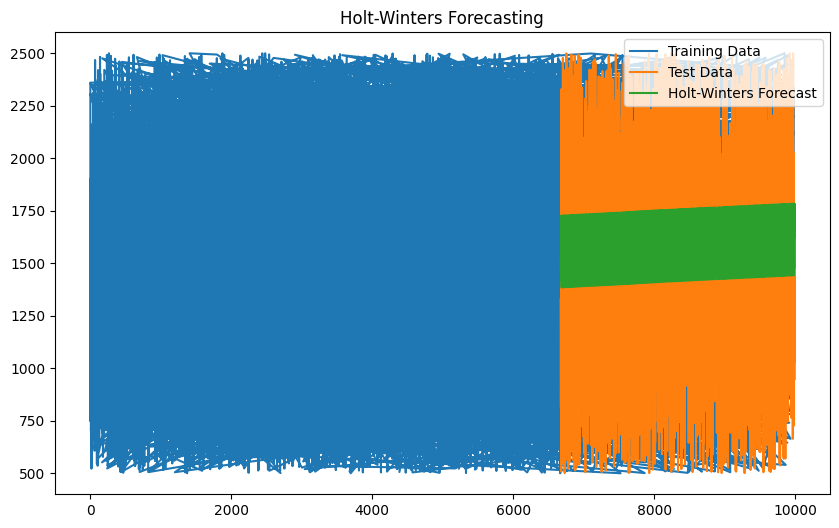

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Select the target column (e.g., sales)
y = data['Sales']

# Train-test split (e.g., last 20% for testing)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12)
hw_model = model.fit()

# Forecast for the test period
forecast = hw_model.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Holt-Winters Forecast')
plt.legend(loc='best')
plt.title('Holt-Winters Forecasting')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Assuming 'train' and 'test' are the training and testing datasets,
# and 'y' is the target demand variable.
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Model 1: Holt-Winters
holt_winters_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
holt_winters_forecast = holt_winters_model.forecast(len(test))
holt_winters_mae = mean_absolute_error(test, holt_winters_forecast)
holt_winters_rmse = sqrt(mean_squared_error(test, holt_winters_forecast))

# Model 2: ARIMA
arima_model = ARIMA(train, order=(5, 1, 0)).fit()
arima_forecast = arima_model.forecast(len(test))
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = sqrt(mean_squared_error(test, arima_forecast))

# Model 3: Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(np.array(range(len(train))).reshape(-1, 1), train)
random_forest_forecast = random_forest_model.predict(np.array(range(len(train), len(train) + len(test))).reshape(-1, 1))
random_forest_mae = mean_absolute_error(test, random_forest_forecast)
random_forest_rmse = sqrt(mean_squared_error(test, random_forest_forecast))

# Model 4: XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(np.array(range(len(train))).reshape(-1, 1), train)
xgb_forecast = xgb_model.predict(np.array(range(len(train), len(train) + len(test))).reshape(-1, 1))
xgb_mae = mean_absolute_error(test, xgb_forecast)
xgb_rmse = sqrt(mean_squared_error(test, xgb_forecast))

# Compare Models
models = ['Holt-Winters', 'ARIMA', 'Random Forest', 'XGBoost']
mae_values = [holt_winters_mae, arima_mae, random_forest_mae, xgb_mae]
rmse_values = [holt_winters_rmse, arima_rmse, random_forest_rmse, xgb_rmse]

best_model_by_mae = models[np.argmin(mae_values)]
best_model_by_rmse = models[np.argmin(rmse_values)]

# Print the Best Model based on MAE and RMSE
print(f"Best Model based on MAE: {best_model_by_mae}")
print(f"Best Model based on RMSE: {best_model_by_rmse}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmode

Best Model based on MAE: Random Forest
Best Model based on RMSE: Random Forest
